<a href="https://colab.research.google.com/github/sykathowlader/group6_introToAi/blob/main/neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import requests
from sklearn import preprocessing
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping







The dataset I'm loading now is a clean dataset of 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_012 has 3 classes. 0 is for no diabetes or only during pregnancy, 1 is for prediabetes, and 2 is for diabetes. This dataset has 21 feature variables

In [2]:
url = "https://sykathowlader.github.io/visualization_data/diabetes.csv"

#Store the dataset into a pandas DataFrame
df = pd.read_csv(url)

#Shuffle the rows of the dataset
np.random.seed(42)
df = df.reindex(np.random.permutation(df.index))
#print the head of the dataset
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
219620,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,3.0,7.0,0.0,0.0,7.0,4.0,2.0
132821,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,13.0,6.0,6.0
151862,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,4.0,7.0
139717,0.0,0.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,3.0,0.0,0.0,1.0,2.0,4.0,7.0
239235,0.0,0.0,1.0,1.0,31.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,4.0,27.0,27.0,1.0,0.0,8.0,3.0,2.0


In [7]:
y = df['Diabetes_012']
X = df.drop('Diabetes_012', axis=1)
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
y_encoded = pd.get_dummies(df['Diabetes_012'])


# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
print(y_test.shape)
model1 = Sequential()
model1.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(y_train.shape[1], activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model1.summary()



(50736, 3)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 64)                1408      
                                                                 
 dense_8 (Dense)             (None, 64)                4160      
                                                                 
 dense_9 (Dense)             (None, 3)                 195       
                                                                 
Total params: 5763 (22.51 KB)
Trainable params: 5763 (22.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
history = model1.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)

Epoch 1/3
5074/5074 [==============================] - 11s 2ms/step - loss: 0.3928 - accuracy: 0.8510 - val_loss: 0.3934 - val_accuracy: 0.8508
Epoch 2/3
5074/5074 [==============================] - 11s 2ms/step - loss: 0.3919 - accuracy: 0.8509 - val_loss: 0.3939 - val_accuracy: 0.8501
Epoch 3/3
5074/5074 [==============================] - 11s 2ms/step - loss: 0.3914 - accuracy: 0.8514 - val_loss: 0.3931 - val_accuracy: 0.8498


1586/1586 [==============================] - 3s 2ms/step - loss: 0.3983 - accuracy: 0.8456
Test Accuracy: 84.56%
1586/1586 [==============================] - 2s 1ms/step


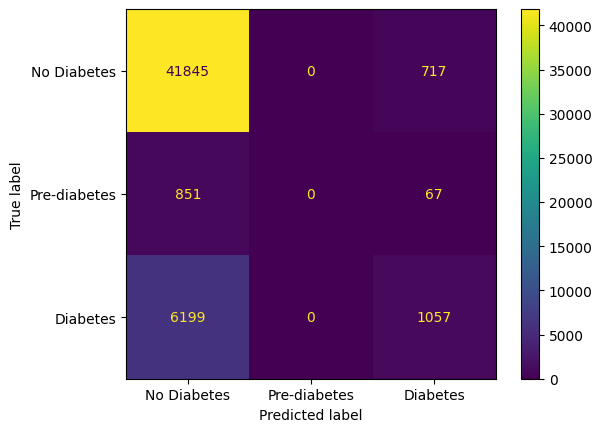

In [10]:
#history = model1.fit(X_train, y_train, epochs=3, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model1.evaluate(X_test, y_test)
print("Test Accuracy: {:.2f}%".format(accuracy * 100))

# Generate predictions
y_pred = model1.predict(X_test)

# Convert predictions to label
y_pred_label = np.argmax(y_pred, axis=1)
y_test_label = np.argmax(y_test.to_numpy(), axis=1)

# Plotting the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_label, y_pred_label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Pre-diabetes', 'Diabetes'])
disp.plot()
plt.show()

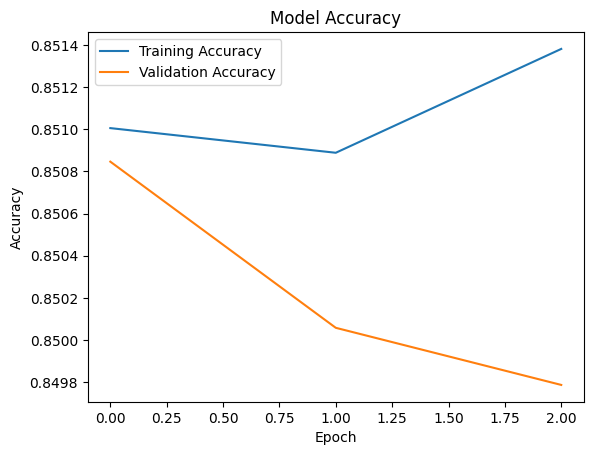

In [11]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

This model can't evaluate the pre-diabetes at all. What I will do is to use another dataset where the target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes..It has the same number of surveys: 253,680 to the CDC's BRFSS2015.

In [4]:
url = "https://sykathowlader.github.io/visualization_data/diabetes2.csv"

#Store the dataset into a pandas DataFrame
df2 = pd.read_csv(url)

print(df2['Diabetes_binary'].unique())
df2.head()


[0. 1.]


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
y2 = df2['Diabetes_binary']
X2 = df2.drop('Diabetes_binary', axis=1)
# Scale the features
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2_scaled, y2, test_size=0.2, random_state=42)
print(X_train2.shape)
print(y_train2.shape)
print(X_test2.shape)
print(y_test2.shape)

(202944, 21)
(202944,)
(50736, 21)
(50736,)


In [ ]:
# Build the model
model2 = Sequential()
model2.add(Dense(128, input_shape=(X_train2.shape[1],), activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compiling the model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()



Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 128)               2816      
                                                                 
 dense_41 (Dense)            (None, 64)                8256      
                                                                 
 dense_42 (Dense)            (None, 32)                2080      
                                                                 
 dense_43 (Dense)            (None, 1)                 33        
                                                                 
Total params: 13185 (51.50 KB)
Trainable params: 13185 (51.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
train2 = model2.fit(X_train2, y_train2, epochs=2, batch_size=32, validation_split=0.2)

# Evaluating the model
loss, accuracy = model2.evaluate(X_test2, y_test2)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/2
5074/5074 [==============================] - 15s 3ms/step - loss: 0.3188 - accuracy: 0.8642 - val_loss: 0.3167 - val_accuracy: 0.8662
Epoch 2/2
1586/1586 [==============================] - 3s 2ms/step - loss: 0.3091 - accuracy: 0.8675
Test Accuracy: 86.75%


1586/1586 [==============================] - 2s 1ms/step


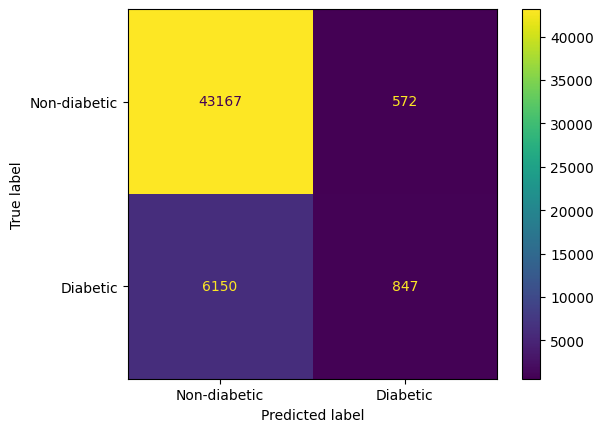

In [ ]:
# Make predictions on the test set
y_pred2 = model2.predict(X_test2)
y_pred2 = np.round(y_pred2).astype(int)  # Converting probabilities to binary class labels

# Generating the confusion matrix
cm = confusion_matrix(y_test2, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-diabetic', 'Diabetic'])

# Display the confusion matrix
disp.plot()
plt.show()

The accuracy is a bit higher than the previous one. However it is crucial to predic the diabetes case with hiher accuracy than the non diabetes one. The high error might be caused because the samples of prediabetes and diabetes cases in the dataset are much lower than the other case. To address this problem I can proceed in two ways. The first one would be to delete  rows of data that refer to non-diabetes and have an equal number of 0 and 1 in the Diabetes_binary column. The second approach is to generate random samples of training data that refer to case 1 of Diabetes_binary column.
Let's proceed with the first technique. I already have an equal 50/50 split of 0 and 1 cases of Binary_diabetes in a csv file.

In [61]:
url = "https://sykathowlader.github.io/visualization_data/diabetes50_50.csv"

#Store the dataset into a pandas DataFrame
df3 = pd.read_csv(url)
df3.head()
#Split X and y
y3 = df3['Diabetes_binary']
X3 = df3.drop('Diabetes_binary', axis=1)
# Scale the features
scaler = StandardScaler()
X3_scaled = scaler.fit_transform(X3)

# Split the dataset into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3_scaled, y3, test_size=0.2, random_state=42)
# Build the model
model3 = Sequential()
model3.add(Dense(128, input_shape=(X_train3.shape[1],), activation='relu'))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

# Compiling the model
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()


Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_109 (Dense)           (None, 128)               2816      
                                                                 
 dense_110 (Dense)           (None, 64)                8256      
                                                                 
 dense_111 (Dense)           (None, 32)                2080      
                                                                 
 dense_112 (Dense)           (None, 1)                 33        
                                                                 
Total params: 13185 (51.50 KB)
Trainable params: 13185 (51.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Training the model
train3 = model3.fit(X_train3, y_train3, epochs=100, batch_size=32, validation_split=0.2)

# Evaluating the model
loss, accuracy = model3.evaluate(X_test3, y_test3)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/10
1414/1414 [==============================] - 4s 2ms/step - loss: 0.5142 - accuracy: 0.7463 - val_loss: 0.5030 - val_accuracy: 0.7505
Epoch 2/10
1414/1414 [==============================] - 3s 2ms/step - loss: 0.5034 - accuracy: 0.7545 - val_loss: 0.5073 - val_accuracy: 0.7490
Epoch 3/10
1414/1414 [==============================] - 3s 2ms/step - loss: 0.5013 - accuracy: 0.7552 - val_loss: 0.5054 - val_accuracy: 0.7472
Epoch 4/10
1414/1414 [==============================] - 4s 3ms/step - loss: 0.4985 - accuracy: 0.7565 - val_loss: 0.5063 - val_accuracy: 0.7512
Epoch 5/10
1414/1414 [==============================] - 4s 3ms/step - loss: 0.4971 - accuracy: 0.7578 - val_loss: 0.5068 - val_accuracy: 0.7485
Epoch 6/10
1414/1414 [==============================] - 3s 2ms/step - loss: 0.4949 - accuracy: 0.7603 - val_loss: 0.5090 - val_accuracy: 0.7473
Epoch 7/10
1414/1414 [==============================] - 4s 3ms/step - loss: 0.4930 - accuracy: 0.7610 - val_loss: 0.5097 - val_accuracy:

442/442 [==============================] - 1s 1ms/step
Accuracy: 0.75


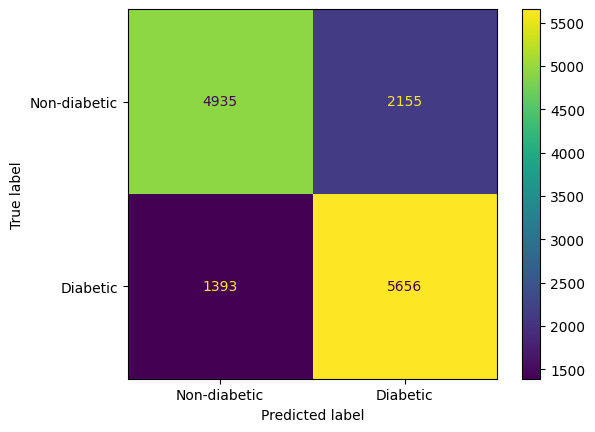

In [ ]:
# Make predictions on the test set
y_pred3 = model3.predict(X_test3)
y_pred3 = np.round(y_pred3).astype(int)  # Converting probabilities to binary class labels
# Calculate accuracy
accuracy = accuracy_score(y_test3, y_pred3)
print(f'Accuracy: {accuracy:.2f}')

# Generating the confusion matrix
cm = confusion_matrix(y_test3, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-diabetic', 'Diabetic'])

# Display the confusion matrix
disp.plot()
plt.show()

Even if the accuracy is a bit lower, I prefer this model over the last one as it is able to predict more cases with diabetes. Let's proceed with the second method where we use the dataset with 253,680 survey responses to the CDC's BRFSS2015. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This time in the training dataset is increased with a random data to balance the class of Diabetes_binary.

In [80]:
y2 = df2['Diabetes_binary']
X2 = df2.drop('Diabetes_binary', axis=1)


# Split the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test4 = train_test_split(X2, y2, test_size=0.2, random_state=42)

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)

# Fit and apply the transform
X_train2_resampled, y_train4 = ros.fit_resample(X_train2, y_train2)

# Check the new class distribution
print(y_train4.value_counts())

# Scaling the features
scaler = StandardScaler()
X_train4 = scaler.fit_transform(X_train2_resampled)
X_test4 = scaler.transform(X_test2)

# Check the shapes of the datasets
print(X_train4.shape, y_train4.shape, X_test4.shape, y_test4.shape)

0.0    174595
1.0    174595
Name: Diabetes_binary, dtype: int64
(349190, 21) (349190,) (50736, 21) (50736,)


In [71]:
#build the model
model4 = Sequential()
model4.add(Dense(64, input_shape=(X_train4.shape[1],), activation='relu'))
#model4.add(Dense(128, activation='relu'))
model4.add(Dense(64, activation='relu'))
model4.add(Dropout(0.5))  # Add dropout layer with 50% dropout rate
model4.add(Dense(32, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification



# Compiling the model
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()
# Implement Early Stopping
early_stopping = EarlyStopping(monitor='loss', min_delta=1e-3, patience=2, verbose=1, mode='auto')



Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_117 (Dense)           (None, 64)                1408      
                                                                 
 dense_118 (Dense)           (None, 64)                4160      
                                                                 
 dropout_15 (Dropout)        (None, 64)                0         
                                                                 
 dense_119 (Dense)           (None, 32)                2080      
                                                                 
 dense_120 (Dense)           (None, 1)                 33        
                                                                 
Total params: 7681 (30.00 KB)
Trainable params: 7681 (30.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [78]:
# Training the model with Early Stopping
train4 = model4.fit(X_train4, y_train4, epochs=100, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

# Evaluating the model
loss, accuracy = model4.evaluate(X_test4, y_test4)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/100
2183/2183 [==============================] - 8s 4ms/step - loss: 0.4814 - accuracy: 0.7597 - val_loss: 0.6532 - val_accuracy: 0.6726
Epoch 2/100
2183/2183 [==============================] - 11s 5ms/step - loss: 0.4807 - accuracy: 0.7602 - val_loss: 0.6491 - val_accuracy: 0.6483
Epoch 3/100
2183/2183 [==============================] - 6s 3ms/step - loss: 0.4802 - accuracy: 0.7605 - val_loss: 0.6361 - val_accuracy: 0.6693
Epoch 4/100
2183/2183 [==============================] - 6s 3ms/step - loss: 0.4796 - accuracy: 0.7608 - val_loss: 0.6287 - val_accuracy: 0.6964
Epoch 5/100
2183/2183 [==============================] - 5s 2ms/step - loss: 0.4786 - accuracy: 0.7616 - val_loss: 0.6646 - val_accuracy: 0.6688
Epoch 6/100
2183/2183 [==============================] - 7s 3ms/step - loss: 0.4780 - accuracy: 0.7617 - val_loss: 0.6626 - val_accuracy: 0.6410
Epoch 7/100
2183/2183 [==============================] - 7s 3ms/step - loss: 0.4779 - accuracy: 0.7619 - val_loss: 0.6583 - val_a

1586/1586 [==============================] - 3s 2ms/step
Accuracy: 0.79


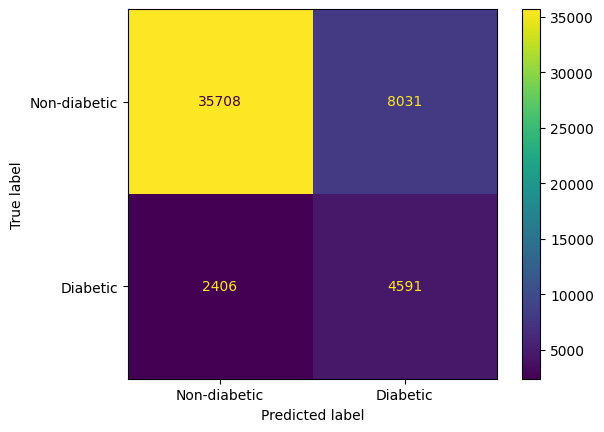

In [79]:
# Make predictions on the test set
y_pred4 = model4.predict(X_test4)
y_pred4 = np.round(y_pred4).astype(int)  # Converting probabilities to binary class labels
# Calculate accuracy
accuracy = accuracy_score(y_test4, y_pred4)
print(f'Accuracy: {accuracy:.2f}')

# Generating the confusion matrix
cm = confusion_matrix(y_test4, y_pred4)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-diabetic', 'Diabetic'])

# Display the confusion matrix
disp.plot()
plt.show()

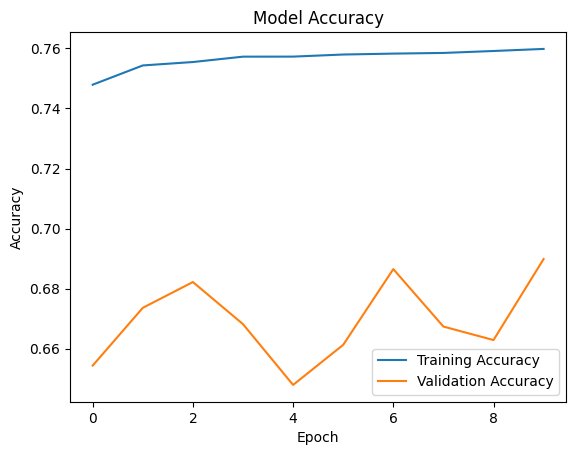

In [60]:
#training_accuracy2 = train4.history['accuracy']
#validation_accuracy2 = train4.history['val_accuracy']
plt.plot(train4.history['accuracy'], label='Training Accuracy')
plt.plot(train4.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras.regularizers import l1_l2

# Build the model with additional improvements
model4 = Sequential()
model4.add(Dense(256, input_shape=(X_train4.shape[1],), activation='relu'))
model4.add(BatchNormalization())
model4.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=1e-5, l2=1e-4)))
model4.add(Dropout(0.5))
model4.add(Dense(64, activation='relu'))
model4.add(Dense(32, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

# Compile the model
model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')

# Model Checkpoint
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', save_best_only=True, verbose=1)

# Reduce Learning Rate on Plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1, mode='auto')

# Training the model with callbacks
history = model4.fit(X_train4, y_train4, epochs=2, batch_size=64, validation_split=0.2, callbacks=[early_stopping, model_checkpoint, reduce_lr], verbose=1)

# Evaluate the model
loss, accuracy = model4.evaluate(X_test4, y_test4, verbose=0)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Epoch 1/2
4360/4365 [============================>.] - ETA: 0s - loss: 0.5248 - accuracy: 0.7490
Epoch 1: val_loss improved from inf to 0.72290, saving model to best_model.h5
4365/4365 [==============================] - 23s 5ms/step - loss: 0.5247 - accuracy: 0.7490 - val_loss: 0.7229 - val_accuracy: 0.6533 - lr: 0.0010
Epoch 2/2
  20/4365 [..............................] - ETA: 24s - loss: 0.5043 - accuracy: 0.7539

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4364/4365 [============================>.] - ETA: 0s - loss: 0.5031 - accuracy: 0.7522
Epoch 2: val_loss did not improve from 0.72290
4365/4365 [==============================] - 19s 4ms/step - loss: 0.5031 - accuracy: 0.7522 - val_loss: 0.7362 - val_accuracy: 0.6503 - lr: 0.0010
Test Accuracy: 79.76%
